# Read in Multivariate Models

Parallel scripts are generated in UberParallel_HIV

In [1]:
from __future__ import division

In [2]:
import NotebookImport
from Setup.DX_Imports import *

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

#### Models un-adjusted for cellular composition

In [5]:
outdir = '/cellar/users/agross/Data/tmp'
p = outdir + '/primary_cohort/'
def read_models(suffix):
    df = pd.concat([pd.read_csv(p + f, index_col=0, header=[0,1]) for 
                    f in os.listdir(p) if f.endswith('{}.csv'.format(suffix))])
    return df

In [6]:
r1 = read_models('hiv_age')
r2 = read_models('hiv_bioage')
r3 = read_models('hiv_age_bio_age')

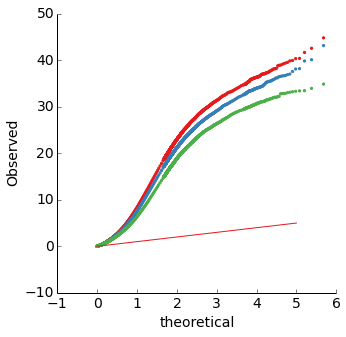

In [7]:
fig, ax = subplots(figsize=(5,5))
qq_plot(r1.HIV_LR.p, ax, colors[0])
qq_plot(r2.HIV_LR.p, ax, colors[1])
qq_plot(r3.HIV_LR.p, ax, colors[2])

ax.plot([0,5],[0,5])

#### Models with cellular composition covariates

In [8]:
r1 = read_models('hiv_age_cc')
r2 = read_models('hiv_bioage_cc')
r3 = read_models('hiv_age_bio_age_cc')
r4 = read_models('hiv_cc')

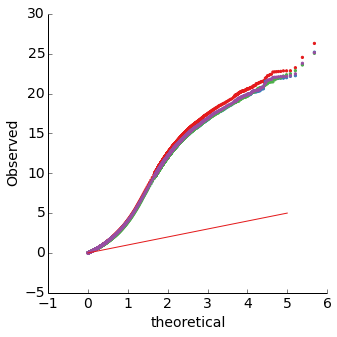

In [9]:
fig, ax = subplots(figsize=(5,5))
qq_plot(r1.HIV_LR.p, ax, colors[0])
qq_plot(r2.HIV_LR.p, ax, colors[1])
qq_plot(r3.HIV_LR.p, ax, colors[2])
qq_plot(r4.HIV_LR.p, ax, colors[3])

ax.plot([0,5],[0,5])

#### Looking for effect of HIV duration

In [10]:
r_long = read_models('duration_age_cc_long')
r_short = read_models('duration_age_cc_short')

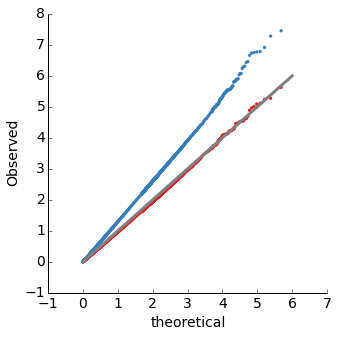

In [11]:
fig, ax = subplots(figsize=(5,5))
qq_plot(r_long.duration_LR.p, ax, colors[0])
qq_plot(r_short.duration_LR.p, ax, colors[1])

ax.plot([0,6],[0,6], color='grey', lw=3)

#### Age associated probes

In [12]:
outdir = '/cellar/users/agross/Data/tmp'
tables = ['in_set_s1','in_set_s2','in_set_s3']

res = {}
for tp in tables:
    p = outdir + '/' + tp + '/'
    res[tp] = pd.concat([pd.read_csv(p + f, index_col=0, header=[0,1]) for 
                    f in os.listdir(p) if f.endswith('age_out.csv')])
res = pd.concat(res, axis=1)

p_vals = res.xs('age_LR', axis=1, level=1).xs('p', axis=1, level=1)

In [13]:
age_res = res

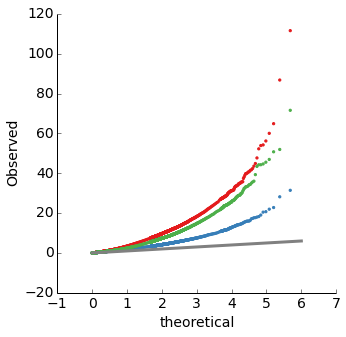

In [25]:
fig, ax = subplots(figsize=(5,5))
qq_plot(p_vals.in_set_s1, ax, colors[0])
qq_plot(p_vals.in_set_s2, ax, colors[1])
qq_plot(p_vals.in_set_s3, ax, colors[2])

ax.plot([0,6],[0,6], color='grey', lw=3);

In [16]:
r1 = 1.*((p_vals.in_set_s1 * len(p_vals)) < .05) 
v = p_vals.in_set_s3.ix[ti(r1>0)]
r2 = 1.*((v * len(v)) < .05)
rr = r1 + r2.ix[p_vals.index].fillna(0)
rr.value_counts()

0    468736
1      6832
2      5088
dtype: int64